# OpenQAOA Example: Manual Mode

In [2]:
from openqaoa.qaoa_parameters import PauliOp, Hamiltonian, QAOACircuitParams, create_qaoa_variational_params
from openqaoa.devices import DeviceQiskit, create_device
from openqaoa.backends.qaoa_backend import *
from openqaoa.optimizers import get_optimizer
from qiskit import QuantumCircuit
from openqaoa.utilities import *

### Define Cost and Mixer Hamiltonians with ease!

In [3]:
cost_hamil = Hamiltonian([PauliOp('ZZ', (0, 1)), PauliOp('ZZ', (1, 2)), PauliOp('ZZ', (0, 2))], 
                         [1, 1, 1], 1)

In [4]:
classical_terms = [(0, 1),(1, 2),(0, 2)]
coeffs = [1, 1, 1]
constant = 1
cost_hamil = Hamiltonian.classical_hamiltonian(terms=classical_terms,coeffs=coeffs,constant=constant)
cost_hamil.expression

1 + 1Z_{0}Z_{1} + 1Z_{0}Z_{2} + 1Z_{1}Z_{2}

In [5]:
mixer_hamil = X_mixer_hamiltonian(n_qubits=3)

### Define QAOA Circuit Parameters
QAOA Circuit Params encode the cost and mixer hamiltonians in the form of an Abstract circuit which will later be used for constructing respective backend circuits

In [6]:
circuit_params = QAOACircuitParams(cost_hamil, mixer_hamil, p=2)

### Define QAOA Variational Parameters
* Variational Params will be used to run QAOA computations to compute, for instance, expectation values. They are designed to be updated easily using an optimiser during VQA optimisation routines
* The user can specify the desired parameterization and initialization strategy 

In [7]:
variate_params = create_qaoa_variational_params(circuit_params,'standard','ramp')

### Define the Backend of your choice!
* Choose from the available local/cloud based devices including IBMQ, Rigetti QPUs
* Depending on whether the chosen device is cloud-based or local, you may have to define an authentication dictionary with your credentials as follows

In [8]:
auth_dict = { "QISKIT": 
             { "API_TOKEN": "<API TOKEN>"
              "HUB": "ibm-q", 
              "GROUP": "open", 
              "PROJECT": "main"}
            }

selected_device = 'ibmq_qasm_simulator'

device_qiskit = DeviceQiskit(auth_dict["QISKIT"]["API_TOKEN"], auth_dict["QISKIT"]["HUB"], 
                   auth_dict["QISKIT"]["GROUP"], auth_dict["QISKIT"]["PROJECT"], selected_device)

In [10]:
backend_cloud = get_qaoa_backend(circuit_params, device_qiskit, n_shots=1000)

In [11]:
backend_cloud.parametric_circuit.draw()

┌───┐                                           »
  q0_0: ┤ H ├──■────────────────────────────────■───────»
        ├───┤┌─┴─┐┌──────────────────────────┐┌─┴─┐     »
  q0_1: ┤ H ├┤ X ├┤ Rz(['2q', 'cost', 0, 0]) ├┤ X ├──■──»
        ├───┤└───┘└──────────────────────────┘└───┘┌─┴─┐»
  q0_2: ┤ H ├──────────────────────────────────────┤ X ├»
        └───┘                                      └───┘»
meas: 3/════════════════════════════════════════════════»
                                                        »
«                                                                           »
«  q0_0: ───────────────────────────────────■───────────────────────────────»
«                                           │  ┌───────────────────────────┐»
«  q0_1: ──────────────────────────────■────┼──┤ Rx(['1q', 'mixer', 0, 1]) ├»
«        ┌──────────────────────────┐┌─┴─┐┌─┴─┐└┬──────────────────────────┤»
«  q0_2: ┤ Rz(['2q', 'cost', 0, 1]) ├┤ X ├┤ X ├─┤ Rz(['2q', 'cost', 0, 2]) ├»
«        └──────────────────────────┘└───┘└───┘ └──────────────────────────┘»
«meas: 3/═══════════════════════════════════════════════════════════════════»
«                                                                           »
«             ┌───────────────────────────┐                                 »
«  q0_0: ──■──┤ Rx(['1q', 'mixer', 0, 0]) ├──■──────────────────────────────»
«          │  └───────────────────────────┘┌─┴─┐┌──────────────────────────┐»
«  q0_1: ──┼───────────────────────────────┤ X ├┤ Rz(['2q', 'cost', 1, 0]) ├»
«        ┌─┴─┐┌───────────────────────────┐└───┘└──────────────────────────┘»
«  q0_2: ┤ X ├┤ Rx(['1q', 'mixer', 0, 2]) ├─────────────────────────────────»
«        └───┘└───────────────────────────┘                                 »
«meas: 3/═══════════════════════════════════════════════════════════════════»
«                                                                           »
«                                                        »
«  q0_0: ──■──────────────────────────────────────────■──»
«        ┌─┴─┐                                        │  »
«  q0_1: ┤ X ├──■────────────────────────────────■────┼──»
«        └───┘┌─┴─┐┌──────────────────────────┐┌─┴─┐┌─┴─┐»
«  q0_2: ─────┤ X ├┤ Rz(['2q', 'cost', 1, 1]) ├┤ X ├┤ X ├»
«             └───┘└──────────────────────────┘└───┘└───┘»
«meas: 3/════════════════════════════════════════════════»
«                                                        »
«                                          ┌───────────────────────────┐ ░ ┌─┐»
«  q0_0: ───────────────────────────────■──┤ Rx(['1q', 'mixer', 1, 0]) ├─░─┤M├»
«        ┌───────────────────────────┐  │  └───────────────────────────┘ ░ └╥┘»
«  q0_1: ┤ Rx(['1q', 'mixer', 1, 1]) ├──┼────────────────────────────────░──╫─»
«        └┬──────────────────────────┤┌─┴─┐┌───────────────────────────┐ ░  ║ »
«  q0_2: ─┤ Rz(['2q', 'cost', 1, 2]) ├┤ X ├┤ Rx(['1q', 'mixer', 1, 2]) ├─░──╫─»
«         └──────────────────────────┘└───┘└───────────────────────────┘ ░  ║ »
«meas: 3/═══════════════════════════════════════════════════════════════════╩═»
«                                                                           0 »
«              
«  q0_0: ──────
«        ┌─┐   
«  q0_1: ┤M├───
«        └╥┘┌─┐
«  q0_2: ─╫─┤M├
«         ║ └╥┘
«meas: 3/═╩══╩═
«         1  2

In [12]:
backend_cloud.qaoa_circuit(variate_params).draw()

┌───┐                                                              »
  q0_0: ┤ H ├──■────────────────■──────────────────────────■───────────────»
        ├───┤┌─┴─┐┌──────────┐┌─┴─┐                        │  ┌───────────┐»
  q0_1: ┤ H ├┤ X ├┤ Rz(0.35) ├┤ X ├──■────────────────■────┼──┤ Rx(-1.05) ├»
        ├───┤└───┘└──────────┘└───┘┌─┴─┐┌──────────┐┌─┴─┐┌─┴─┐└┬──────────┤»
  q0_2: ┤ H ├──────────────────────┤ X ├┤ Rz(0.35) ├┤ X ├┤ X ├─┤ Rz(0.35) ├»
        └───┘                      └───┘└──────────┘└───┘└───┘ └──────────┘»
meas: 3/═══════════════════════════════════════════════════════════════════»
                                                                           »
«             ┌───────────┐                                                 »
«  q0_0: ──■──┤ Rx(-1.05) ├──■────────────────■──────────────────────────■──»
«          │  └───────────┘┌─┴─┐┌──────────┐┌─┴─┐                        │  »
«  q0_1: ──┼───────────────┤ X ├┤ Rz(1.05) ├┤ X ├──■────────────────■────┼──»
«        ┌─┴─┐┌───────────┐└───┘└──────────┘└───┘┌─┴─┐┌──────────┐┌─┴─┐┌─┴─┐»
«  q0_2: ┤ X ├┤ Rx(-1.05) ├──────────────────────┤ X ├┤ Rz(1.05) ├┤ X ├┤ X ├»
«        └───┘└───────────┘                      └───┘└──────────┘└───┘└───┘»
«meas: 3/═══════════════════════════════════════════════════════════════════»
«                                                                           »
«                          ┌───────────┐ ░ ┌─┐      
«  q0_0: ───────────────■──┤ Rx(-0.35) ├─░─┤M├──────
«        ┌───────────┐  │  └───────────┘ ░ └╥┘┌─┐   
«  q0_1: ┤ Rx(-0.35) ├──┼────────────────░──╫─┤M├───
«        └┬──────────┤┌─┴─┐┌───────────┐ ░  ║ └╥┘┌─┐
«  q0_2: ─┤ Rz(1.05) ├┤ X ├┤ Rx(-0.35) ├─░──╫──╫─┤M├
«         └──────────┘└───┘└───────────┘ ░  ║  ║ └╥┘
«meas: 3/═══════════════════════════════════╩══╩══╩═
«                                           0  1  2

### Creating other backends

In [13]:
qiskit_sim = create_device('local','qiskit.statevector_simulator')
backend_qiskit_statevec = get_qaoa_backend(circuit_params, qiskit_sim)

In [14]:
from qiskit.providers.aer.noise import NoiseModel
from qiskit import IBMQ
# IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q-startup','entropica-labs','reservations')
backend = provider.get_backend('ibmq_bogota')
noise_model = NoiseModel.from_backend(backend)

In [15]:
qiskit_shot_sim = create_device('local','qiskit.shot_simulator')
backend_qiskit_shot = get_qaoa_backend(circuit_params, qiskit_shot_sim, n_shots=100, noise_model=noise_model)

In [16]:
print(backend_qiskit_statevec.expectation(variate_params))
print(backend_qiskit_statevec.expectation_w_uncertainty(variate_params))

0.006166710717490089
(0.006166710717490089, 0.1569357019574805)


In [17]:
print(backend_qiskit_shot.expectation(variate_params))
print(backend_qiskit_shot.expectation_w_uncertainty(variate_params))

0.28
(0.44000000000000006, 1.2515590277729614)


In [18]:
current_ckt = backend_qiskit_shot.qaoa_circuit(variate_params)

In [19]:
#print parametric qaoa circuit
backend_qiskit_shot.parametric_circuit.draw()

┌───┐                                                      »
  q2_0: ┤ H ├─■────────────────────────────────────────────────────»
        ├───┤ │ZZ(['2q', 'cost', 0, 0])                            »
  q2_1: ┤ H ├─■──────────────────────────■─────────────────────────»
        ├───┤                            │ZZ(['2q', 'cost', 0, 1]) »
  q2_2: ┤ H ├────────────────────────────■─────────────────────────»
        └───┘                                                      »
meas: 3/═══════════════════════════════════════════════════════════»
                                                                   »
«                                   ┌───────────────────────────┐»
«  q2_0: ─■─────────────────────────┤ Rx(['1q', 'mixer', 0, 0]) ├»
«         │                         ├───────────────────────────┤»
«  q2_1: ─┼─────────────────────────┤ Rx(['1q', 'mixer', 0, 1]) ├»
«         │ZZ(['2q', 'cost', 0, 2]) ├───────────────────────────┤»
«  q2_2: ─■─────────────────────────┤ Rx(['1q', 'mixer', 0, 2]) ├»
«                                   └───────────────────────────┘»
«meas: 3/════════════════════════════════════════════════════════»
«                                                                »
«                                                              »
«  q2_0: ─■────────────────────────────────────────────────────»
«         │ZZ(['2q', 'cost', 1, 0])                            »
«  q2_1: ─■──────────────────────────■─────────────────────────»
«                                    │ZZ(['2q', 'cost', 1, 1]) »
«  q2_2: ────────────────────────────■─────────────────────────»
«                                                              »
«meas: 3/══════════════════════════════════════════════════════»
«                                                              »
«                                   ┌───────────────────────────┐ ░ ┌─┐      
«  q2_0: ─■─────────────────────────┤ Rx(['1q', 'mixer', 1, 0]) ├─░─┤M├──────
«         │                         ├───────────────────────────┤ ░ └╥┘┌─┐   
«  q2_1: ─┼─────────────────────────┤ Rx(['1q', 'mixer', 1, 1]) ├─░──╫─┤M├───
«         │ZZ(['2q', 'cost', 1, 2]) ├───────────────────────────┤ ░  ║ └╥┘┌─┐
«  q2_2: ─■─────────────────────────┤ Rx(['1q', 'mixer', 1, 2]) ├─░──╫──╫─┤M├
«                                   └───────────────────────────┘ ░  ║  ║ └╥┘
«meas: 3/════════════════════════════════════════════════════════════╩══╩══╩═
«                                                                    0  1  2

In [20]:
#print the full circuit with attached angles
current_ckt.draw()

┌───┐                                 ┌───────────┐           »
  q2_0: ┤ H ├─■─────────────────────■─────────┤ Rx(-1.05) ├─■─────────»
        ├───┤ │ZZ(0.35)             │         ├───────────┤ │ZZ(1.05) »
  q2_1: ┤ H ├─■──────────■──────────┼─────────┤ Rx(-1.05) ├─■─────────»
        ├───┤            │ZZ(0.35)  │ZZ(0.35) ├───────────┤           »
  q2_2: ┤ H ├────────────■──────────■─────────┤ Rx(-1.05) ├───────────»
        └───┘                                 └───────────┘           »
meas: 3/══════════════════════════════════════════════════════════════»
                                                                      »
«                              ┌───────────┐ ░ ┌─┐      
«  q2_0: ────────────■─────────┤ Rx(-0.35) ├─░─┤M├──────
«                    │         ├───────────┤ ░ └╥┘┌─┐   
«  q2_1: ─■──────────┼─────────┤ Rx(-0.35) ├─░──╫─┤M├───
«         │ZZ(1.05)  │ZZ(1.05) ├───────────┤ ░  ║ └╥┘┌─┐
«  q2_2: ─■──────────■─────────┤ Rx(-0.35) ├─░──╫──╫─┤M├
«                              └───────────┘ ░  ║  ║ └╥┘
«meas: 3/═══════════════════════════════════════╩══╩══╩═
«                                               0  1  2

In [21]:
backend_cloud.expectation_w_uncertainty(variate_params)

(0.004, 0.12642784503423288)

In [22]:
backend_qiskit_statevec.qfim(variate_params)

<function openqaoa.basebackend.QAOABaseBackendStatevector.qfim.<locals>.qfim_fun(args)>

In [23]:
optimizer_dict = {'method': 'cobyla', 'maxiter': 10}

In [24]:
optimizer_obj = get_optimizer(backend_qiskit_shot, variate_params, optimizer_dict)

In [25]:
optimizer_obj

Optimizer for VQA of type: QAOABaseBackendShotBased 
Backend: QAOAQiskitBackendShotBasedSimulator 
Method: COBYLA with Max Iterations: 10

In [26]:
optimizer_obj()
optimizer_obj.results_information()

{'opt result':      fun: 0.4
    maxcv: 0.0
  message: 'Maximum number of function evaluations has been exceeded.'
     nfev: 10
   status: 2
  success: False
        x: array([0.64215273, 0.175     , 0.13140829, 0.525     ]),
 'parameter log': [[0.5249999999999999, 0.175, 0.175, 0.5249999999999999],
  [1.525, 0.175, 0.175, 0.5249999999999999],
  [0.5249999999999999, 1.175, 0.175, 0.5249999999999999],
  [0.5249999999999999, 0.175, 1.175, 0.5249999999999999],
  [0.5249999999999999, 0.175, 0.175, 1.525],
  [0.27581992325310845,
   -0.49467145625727077,
   -0.49467145625727077,
   0.32254118764315065],
  [0.4004099616265542,
   -0.1598357281286354,
   -0.1598357281286354,
   0.4237705938215753],
  [0.5054736881031882,
   0.4181320406177938,
   0.12252303677731852,
   0.5091348715838404],
  [0.6421527313821951, 0.175, 0.13140828599732268, 0.5249999999999999],
  [0.7413217596653987,
   0.16184534823533464,
   0.3594825497405405,
   0.5032149320794109]],
 'final params': [0.6421527313821951,

In [27]:
optimizer_obj()
optimizer_obj.results_information()

{'opt result':      fun: 0.28
    maxcv: 0.0
  message: 'Maximum number of function evaluations has been exceeded.'
     nfev: 10
   status: 2
  success: False
        x: array([0.525, 0.175, 0.175, 0.525]),
 'parameter log': [[0.5249999999999999, 0.175, 0.175, 0.5249999999999999],
  [1.525, 0.175, 0.175, 0.5249999999999999],
  [0.5249999999999999, 1.175, 0.175, 0.5249999999999999],
  [0.5249999999999999, 0.175, 1.175, 0.5249999999999999],
  [0.5249999999999999, 0.175, 0.175, 1.525],
  [0.27581992325310845,
   -0.49467145625727077,
   -0.49467145625727077,
   0.32254118764315065],
  [0.4004099616265542,
   -0.1598357281286354,
   -0.1598357281286354,
   0.4237705938215753],
  [0.5054736881031882,
   0.4181320406177938,
   0.12252303677731852,
   0.5091348715838404],
  [0.6421527313821951, 0.175, 0.13140828599732268, 0.5249999999999999],
  [0.7413217596653987,
   0.16184534823533464,
   0.3594825497405405,
   0.5032149320794109],
  [0.5249999999999999, 0.175, 0.175, 0.5249999999999999],

### Some useful functions to play around with!

In [28]:
from openqaoa.utilities import plot_energy_spectrum

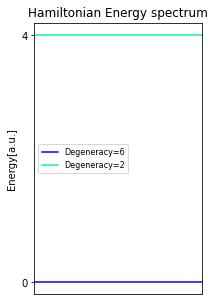

In [29]:
plot_energy_spectrum(cost_hamil)